___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using algorithms ***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df= pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [3]:
df.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

### Data Wrangling
Take info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

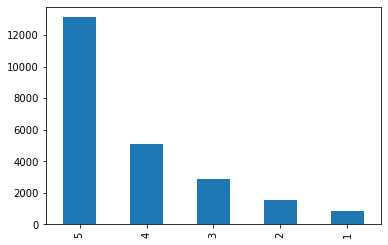

In [5]:
df["Rating"].value_counts().plot.bar()

In [6]:
df.groupby(["Class Name","Rating"]).Rating.count()

Class Name  Rating
Blouses     1          119
            2          229
            3          394
            4          669
            5         1686
                      ... 
Trend       1           11
            2           11
            3           19
            4           26
            5           52
Name: Rating, Length: 93, dtype: int64

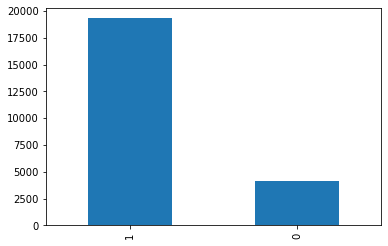

In [7]:
df["Recommended IND"].value_counts().plot.bar()

In [8]:
# imbalanced data
df["Recommended IND"].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

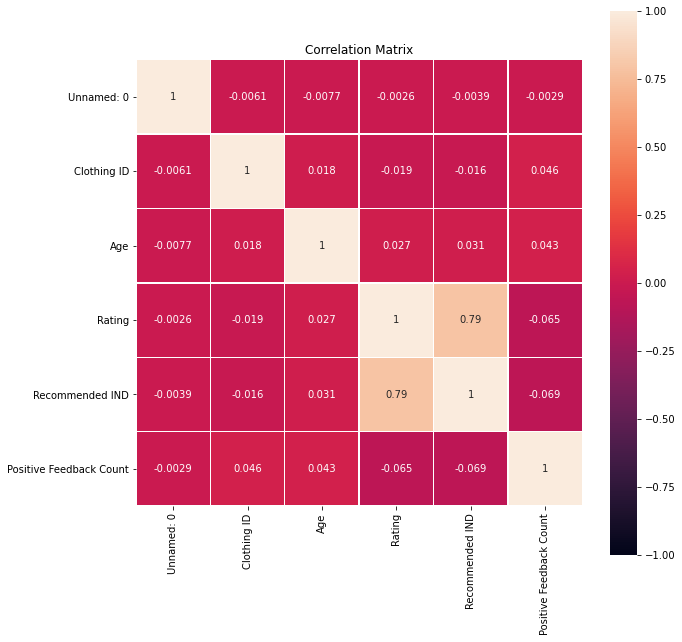

In [9]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix,square=True, annot=True, linewidths=.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix")

plt.show();

In [10]:
#3
df['Recommended IND'].corr(df['Positive Feedback Count'])

-0.06904528557098552

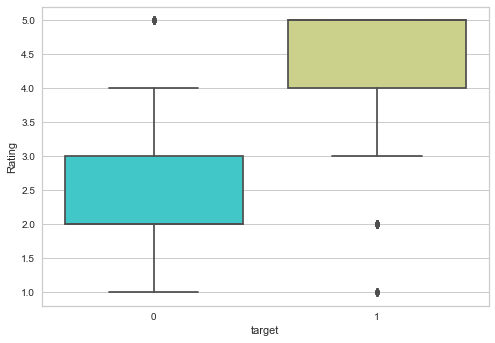

In [100]:

sns.boxplot(x='target',y='Rating',data=df, palette='rainbow');

---
---


## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

**Age Column**

In [11]:
pd.set_option('display.max_rows', None)

In [12]:
df.head(3)

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   

   Positive Feedback Count Division Name Department Name Class Name  
0                        0     Initmates        Intimate  Intimates  
1                        4       General         Dresses    Dresses  
2                        0       General         Dresses    Dresses

In [13]:
df.Age.describe()

count    23486.000000
mean        43.198544
std         12.279544
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

In [14]:
# Each rating generally given by same age group 
df.groupby("Rating").Age.mean()

Rating
1    43.693587
2    42.622364
3    42.158481
4    42.887532
5    43.583124
Name: Age, dtype: float64

In [15]:
# we grouped Ratings by Class as you see five star more than others
df.groupby(["Class Name" ]).Rating.value_counts()

Class Name      Rating
Blouses         5         1686
                4          669
                3          394
                2          229
                1          119
Casual bottoms  4            1
                5            1
Chemises        4            1
Dresses         5         3397
                4         1395
                3          838
                2          461
                1          228
Fine gauge      5          646
                4          230
                3          119
                2           75
                1           30
Intimates       5           96
                4           27
                3           16
                2            8
                1            7
Jackets         5          451
                4          118
                3           62
                2           38
                1           35
Jeans           5          729
                4          218
                3          115
                

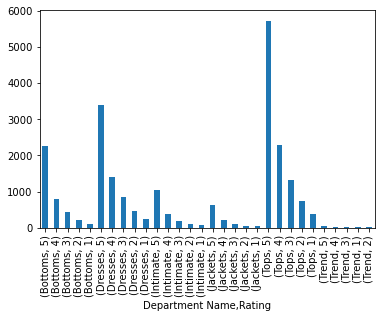

In [16]:
df.groupby("Department Name").Rating.value_counts().plot.bar()

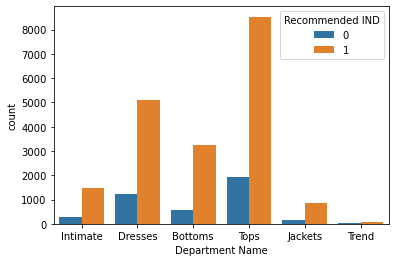

In [17]:
sns.countplot(x='Department Name',data=df, hue='Recommended IND' );

In [18]:
# most of those who give five star (aproximately %99.8) recommended the product
#and most of those who give five star (aproximately %96.7) recommended the product
aa = df[(df["Rating"]==5)|(df["Rating"]==4)][["Recommended IND","Rating"] ]
aa.groupby("Rating")["Recommended IND"].value_counts(normalize=True)

Rating  Recommended IND
4       1                  0.966910
        0                  0.033090
5       1                  0.998096
        0                  0.001904
Name: Recommended IND, dtype: float64

In [19]:
df.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [20]:
# renamed our important columns

In [21]:
df.rename({"Review Text":"sentiment","Recommended IND":"target"},axis=1,inplace=True)

In [22]:
df.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                           sentiment  Rating  target  \
0  Absolutely wonderful - silky and sexy and comf...       4       1   
1  Love this dress!  it's sooo pretty.  i happene...       5       1   
2  I had such high hopes for this dress and reall...       3       0   
3  I love, love, love this jumpsuit. it's fun, fl...       5       1   
4  This shirt is very flattering to all due to th...       5       1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [23]:
data= df[["sentiment","target","Rating"]]

In [24]:
# we examine target column by rating values. as you see rating level affect the recommandation
data.groupby("Rating")["target"].value_counts()

Rating  target
1       0           826
        1            16
2       0          1471
        1            94
3       0          1682
        1          1189
4       1          4909
        0           168
5       1         13106
        0            25
Name: target, dtype: int64

### Missing Value Detection

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  22641 non-null  object
 1   target     23486 non-null  int64 
 2   Rating     23486 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 550.6+ KB


In [26]:
# using with "~" ,we recieve all data except nan values
data[~data["sentiment"].isnull()]

sentiment  target  Rating
0      Absolutely wonderful - silky and sexy and comf...       1       4
1      Love this dress!  it's sooo pretty.  i happene...       1       5
2      I had such high hopes for this dress and reall...       0       3
3      I love, love, love this jumpsuit. it's fun, fl...       1       5
4      This shirt is very flattering to all due to th...       1       5
5      I love tracy reese dresses, but this one is no...       0       2
6      I aded this in my basket at hte last mintue to...       1       5
7      I ordered this in carbon for store pick up, an...       1       4
8      I love this dress. i usually get an xs but it ...       1       5
9      I'm 5"5' and 125 lbs. i ordered the s petite t...       1       5
10     Dress runs small esp where the zipper area run...       0       3
11     This dress is perfection! so pretty and flatte...       1       5
12     More and more i find myself reliant on the rev...       1       5
13     Bought the black xs to go under the larkspur m...       1       5
14     This is a nice choice for holiday gatherings. ...       1       3
15     I took these out of the package and wanted the...       1       4
16     Material and color is nice.  the leg opening i...       1       3
17     Took a chance on this blouse and so glad i did...       1       5
18     A flattering, super cozy coat.  will work well...       1       5
19     I love the look and feel of this tulle dress. ...       1       5
20     If this product was in petite, i would get the...       1       4
21     I'm upset because for the price of the dress, ...       1       4
22     First of all, this is not pullover styling. th...       0       2
23     Cute little dress fits tts. it is a little hig...       1       3
24     I love this shirt because when i first saw it,...       1       5
25     Loved the material, but i didnt really look at...       0       3
26     I have been waiting for this sweater coat to s...       0       2
27     The colors weren't what i expected either. the...       1       4
28     I have several of goodhyouman shirts and i get...       1       5
29     This sweater is so comfy and classic - it bala...       1       5
30     Beautifully made pants and on trend with the f...       1       5
31     I never would have given these pants a second ...       1       5
32     These pants are even better in person. the onl...       1       5
33     I ordered this 3 months ago, and it finally ca...       0       2
34     This is such a neat dress. the color is great ...       1       5
35     Wouldn't have given them a second look but tri...       1       4
36     This is a comfortable skirt that can span seas...       1       4
37     Just ordered this in a small for me (5'6", 135...       1       5
38     Super cute and comfy pull over. sizing is accu...       1       5
39     Great casual top with flare. looks cute with g...       1       5
40     Pretty and unique. great with jeans or i have ...       1       4
41     This is a beautiful top. it's unique and not s...       1       5
42     This poncho is so cute i love the plaid check ...       1       5
43     First, this is thermal ,so naturally i didn't ...       1       4
44     Tried this on today at my local retailer and h...       1       5
45     I bought this item from online... the fit on t...       1       4
46     I love this top. i wear it all the time.  the ...       1       5
47     Very comfortable, material is good, cut out on...       1       5
48     This sweater is perfect for fall...it's roomy,...       1       5
49     Really cute top! the embroidery on the collar ...       1       5
50     This is a cute top that can transition easily ...       1       4
51     I absolutely love this bib tee! it's probably ...       1       5
52     Love the color and style, but material snags e...       1       3
53     Very soft and comfortable. the shirt has an un...       1       5
54     Nice top. armholes are a 

In [27]:
# new dataset without nan values
# '~' eliminate missing values
data = data[~data["sentiment"].isnull()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  22641 non-null  object
 1   target     22641 non-null  int64 
 2   Rating     22641 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 707.5+ KB


In [28]:
data["target"].value_counts()

1    18540
0     4101
Name: target, dtype: int64

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



In [29]:
stop_words = stopwords.words("english")
lem =WordNetLemmatizer()

def cleaning(data):
    # tokenize
    text_tokens = word_tokenize(data.lower())
    # Remove puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    # removing stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    #lemma
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
    # joining
    return " ".join(text_cleaned)

### Tokenization

In [30]:
# **Word Tokenization and lowercase**
data["sentiment"]=data["sentiment"].apply(lambda x: word_tokenize(x.lower()))


### Noise Removal

In [31]:
#**Remove Punctuation and numbers and chars like "*" and "#"**
data["sentiment"]=data["sentiment"].apply(lambda x: list(i for i in x if i.isalpha()))

In [32]:
# **Remove Stopwords**
stop_words = stopwords.words('english')
data["sentiment"]=data["sentiment"].apply(lambda x: list(i for i in x if i not in stop_words))

### Lexicon Normalization

In [33]:
# **lemmatization**
lem=WordNetLemmatizer()
data["sentiment"]=data["sentiment"].apply(lambda x: list(lem.lemmatize(i) for i in x))


In [34]:
data["sentiment"]

0        [absolutely, wonderful, silky, sexy, comfortable]
1        [love, dress, sooo, pretty, happened, find, st...
2        [high, hope, dress, really, wanted, work, init...
3        [love, love, love, jumpsuit, fun, flirty, fabu...
4        [shirt, flattering, due, adjustable, front, ti...
5        [love, tracy, reese, dress, one, petite, foot,...
6        [aded, basket, hte, last, mintue, see, would, ...
7        [ordered, carbon, store, pick, ton, stuff, alw...
8        [love, dress, usually, get, x, run, little, sn...
9        [lb, ordered, petite, make, sure, length, long...
10       [dress, run, small, esp, zipper, area, run, or...
11                 [dress, perfection, pretty, flattering]
12       [find, reliant, review, written, savvy, shoppe...
13       [bought, black, x, go, larkspur, midi, dress, ...
14       [nice, choice, holiday, gathering, like, lengt...
15       [took, package, wanted, fit, badly, could, tel...
16       [material, color, nice, leg, opening, large, l.

In [35]:
#df[df["sentiment"].notnull()]["sentiment"].apply(lambda x: word_tokenize(x.lower()))

In [36]:
# join
data["sentiment"]=data["sentiment"].apply(lambda x: " ".join(x))

In [37]:
rare_words = pd.Series(' '.join(data['sentiment']).split()).value_counts()[-300:]
data['sentiment'] = data['sentiment'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_words))

---
---


## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


In [163]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [164]:
data[data["target"]==0]["sentiment"].values

array(['high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c',
       'love tracy reese dress one petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style work returned dress',
       'dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back',
       ...,
       'purchased good price typically love maeve fabric thin slinky unfortunate way made finding appropriate undergarment difficult add slip helped figured since losing weight would look better pound sa

### Detect Reviews (positive and negative separately)

**sentiments with low rating** 

In [165]:
# we created worcloud which consisting of low rated sentiments
low_rating = []
for i in data[(data["Rating"]==1)|(data["Rating"]==2)]["sentiment"].values:
    low_rating.append(i)
low_text = " ".join(low_rating)    

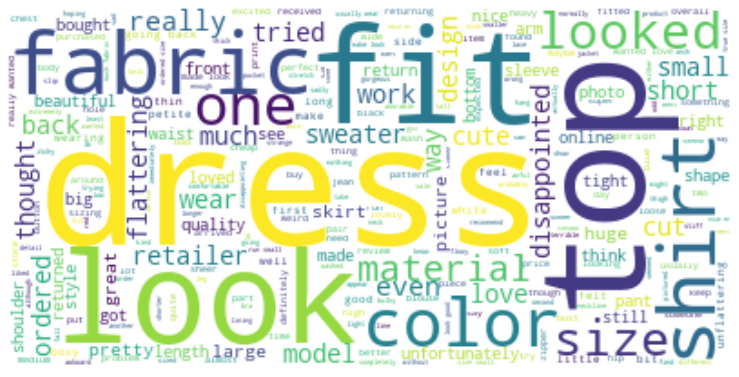

In [166]:
wordcloud.generate(low_text)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [167]:
negative_sent = []
for i in data[data["target"]==0]["sentiment"].values:
    negative_sent.append(i)

positive_sent = []
for i in data[data["target"]==1]["sentiment"].values:
    positive_sent.append(i)    

In [168]:
text = " ".join(negative_sent)  
text_positive = " ".join(positive_sent) 

In [169]:
wordcloud = WordCloud(background_color="white",max_words=500)

**Negative WordCloud**

In [170]:
wordcloud.generate(text)

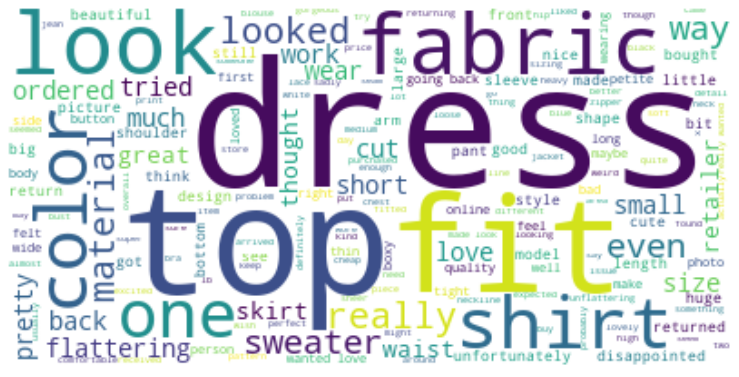

In [171]:
plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
# plotting most common  words in negative sentiments with wordcloud

**Positive WordCloud**

In [172]:
wordcloud.generate(text_positive)

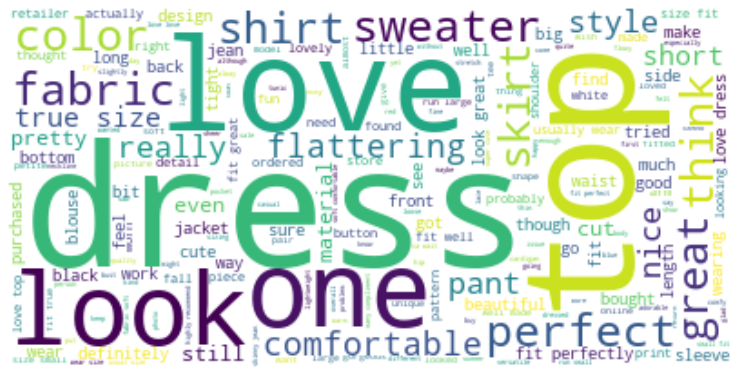

In [173]:
plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
# plotting most common  words in negative sentiments with wordcloud

### Collect Words (positive and negative separately)

In [88]:
negative_sent = []
for i in data[data["target"]==0]["sentiment"].values:
    negative_sent.append(i)

positive_sent = []
for i in data[data["target"]==1]["sentiment"].values:
    positive_sent.append(i)   

NameError: name 'positive_sent' is not defined

## 5. Sentiment Classification with Machine Learning

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting.

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [38]:
X_train, X_test, y_train, y_test = train_test_split(data["sentiment"],
                                                                   data["target"],
                                                                    random_state = 1)

In [39]:
X_train.head()

9623     lightweight knit flattering color made top per...
18715    gorgeous sweater great proportion term length ...
16774    grabbed dress green saw sale plus additional p...
14183                   beautiful sweatshirt top worn work
9521     bought lavender one glad sweater look prettier...
Name: sentiment, dtype: object

In the next step we create a numerical feature vector for each document:

### Vectorization

In [40]:
## Count Vectors

vectorizer =CountVectorizer()
vectorizer.fit(X_train)

X_train_count = vectorizer.transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [ ]:
pd.DataFrame(X_train_count.toarray(),columns=vectorizer.get_feature_names())

### TF-IDF

In [41]:

tf_idf_word_vec = TfidfVectorizer()
tf_idf_word_vec.fit(X_train)

X_train_tfidf = tf_idf_word_vec.transform(X_train)
X_test_tfidf = tf_idf_word_vec.transform(X_test)

In [42]:
tf_idf_word_vec.get_feature_names()[0:5]

['aa', 'aaaaaaamazing', 'aaaaannnnnnd', 'aaaahs', 'aaahed']

In [48]:
X_train_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
pd.DataFrame(X_train_tfidf.toarray(),columns=vectorizer.get_feature_names())

aa  aaaaaaamazing  aaaaannnnnnd  aaaahs  aaahed  aame   ab  abbey  \
0      0.0            0.0           0.0     0.0     0.0   0.0  0.0    0.0   
1      0.0            0.0           0.0     0.0     0.0   0.0  0.0    0.0   
2      0.0            0.0           0.0     0.0     0.0   0.0  0.0    0.0   
3      0.0            0.0           0.0     0.0     0.0   0.0  0.0    0.0   
4      0.0            0.0           0.0     0.0     0.0   0.0  0.0    0.0   
...    ...            ...           ...     ...     ...   ...  ...    ...   
16975  0.0            0.0           0.0     0.0     0.0   0.0  0.0    0.0   
16976  0.0            0.0           0.0     0.0     0.0   0.0  0.0    0.0   
16977  0.0            0.0           0.0     0.0     0.0   0.0  0.0    0.0   
16978  0.0            0.0           0.0     0.0     0.0   0.0  0.0    0.0   
16979  0.0            0.0           0.0     0.0     0.0   0.0  0.0    0.0   

       abby  abck  ...  zipped    zipper  zippered  zipping  zombie  zone  \
0       0.0   0.0  ...     0.0  0.000000       0.0      0.0     0.0   0.0   
1       0.0   0.0  ...     0.0  0.000000       0.0      0.0     0.0   0.0   
2       0.0   0.0  ...     0.0  0.423926       0.0      0.0     0.0   0.0   
3       0.0   0.0  ...     0.0  0.000000       0.0      0.0     0.0   0.0   
4       0.0   0.0  ...     0.0  0.000000       0.0      0.0     0.0   0.0   
...     ...   ...  ...     ...       ...       ...      ...     ...   ...   
16975   0.0   0.0  ...     0.0  0.000000       0.0      0.0     0.0   0.0   
16976   0.0   0.0  ...     0.0  0.000000       0.0      0.0     0.0   0.0   
16977   0.0   0.0  ...     0.0  0.000000       0.0      0.0     0.0   0.0   
16978   0.0   0.0  ...     0.0  0.000000       0.0      0.0     0.0   0.0   
16979   0.0   0.0  ...     0.0  0.000000       0.0      0.0     0.0   0.0   

       zoolander  zoom  zooming  zuma  
0            0.0   0.0      0.0   0.0  
1            0.0   0.0      0.0   0.0  
2            0.0   0.0      0.0   0.0  
3            0.0   0.0      0.0   0.0  
4            0.0   0.0      0.0   0.0  
...          ...   ...      ...   ...  
16975        0.0   0.0      0.0   0.0  
16976        0.0   0.0      0.0   0.0  
16977        0.0   0.0      0.0   0.0  
16978        0.0   0.0      0.0   0.0  
16979        0.0   0.0      0.0   0.0  

[16980 rows x 10506 columns]

### Logistic Regression

In [78]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [79]:
log_classifier = LogisticRegression()
log_classifier.fit(X_train_count, y_train)

# Make predictions
y_pred = log_classifier.predict(X_test_count)

In [80]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test, y_pred))

[[ 611  393]
 [ 203 4454]]
              precision    recall  f1-score   support

           0       0.75      0.61      0.67      1004
           1       0.92      0.96      0.94      4657

    accuracy                           0.89      5661
   macro avg       0.83      0.78      0.80      5661
weighted avg       0.89      0.89      0.89      5661



In [81]:
# We used cross validation to make sure that model score is true  
from sklearn.metrics import classification_report, confusion_matrix
log_classifier = LogisticRegression()
log_classifier.fit(X_train_count, y_train)
# Make predictions
log_accuracy_count = cross_val_score(log_classifier,
                                                     X_test_count,
                                                     y_test,
                                                     cv=10).mean()
print('Count Vector Accuracy:', log_accuracy_count)

Count Vector Accuracy: 0.8855310636229363


In [84]:
from sklearn.metrics import classification_report, confusion_matrix
log_classifier = LogisticRegression()
log_classifier.fit(X_train_tfidf, y_train)
# Make predictions
log_accuracy_tfidf = cross_val_score(log_classifier,
                                                    X_test_tfidf,
                                                     y_test,
                                                     cv=10).mean()
print('Tfidf Vector Accuracy:', log_accuracy_count)

Tfidf Vector Accuracy: 0.8768753778176629


### Naive Bayes 



In [90]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
y_pred = mnb.fit(X_train_count, y_train).predict(X_test_count)

In [91]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test, y_pred))

[[ 668  336]
 [ 261 4396]]
              precision    recall  f1-score   support

           0       0.72      0.67      0.69      1004
           1       0.93      0.94      0.94      4657

    accuracy                           0.89      5661
   macro avg       0.82      0.80      0.81      5661
weighted avg       0.89      0.89      0.89      5661



In [93]:
mnb_accuracy_count = cross_val_score(mnb,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", mnb_accuracy_count)

mnb= MultinomialNB().fit(X_train_tfidf , y_train)

mnb_accuracy_tf = cross_val_score(mnb, 
                                           X_test_tfidf, 
                                           y_test, 
                                           cv = 10).mean()
print("TF-IDF Accuracy:", mnb_accuracy_tf)

Count Vectors Accuracy: 0.8781118153320744
TF-IDF Accuracy: 0.8229996697016719


**Bernoulli Naive Bayes**

In [94]:
from sklearn.naive_bayes import BernoulliNB

In [95]:
bnb= BernoulliNB().fit(X_train_count , y_train)

bnb_accuracy_count = cross_val_score(bnb,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", bnb_accuracy_count)

bnb= BernoulliNB().fit(X_train_tfidf , y_train)

bnb_accuracy_tf = cross_val_score(bnb, 
                                           X_test_tfidf, 
                                           y_test, 
                                           cv = 10).mean()
print("TF-IDF Accuracy:", bnb_accuracy_tf)

Count Vectors Accuracy: 0.8583281918970964
TF-IDF Accuracy: 0.8583281918970964


### Support Vector Machine (SVM)

In [54]:
from sklearn.svm import SVC
svc = SVC().fit(X_train_count, y_train)
# Make predictions
y_pred = svc.predict(X_test_count)
print(confusion_matrix(y_test, y_pred), '\n', '\n')
print(classification_report(y_test, y_pred))


[[ 506  498]
 [ 111 4546]] 
 

              precision    recall  f1-score   support

           0       0.82      0.50      0.62      1004
           1       0.90      0.98      0.94      4657

    accuracy                           0.89      5661
   macro avg       0.86      0.74      0.78      5661
weighted avg       0.89      0.89      0.88      5661



In [ ]:
svc = SVC().fit(X_train_count, y_train)
svc_accuracy_count = model_selection.cross_val_score(svc,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", svc_accuracy_count)

svc = SVC().fit(X_train_tfidf , y_train)

svc_accuracy_tf = model_selection.cross_val_score(svc, 
                                           X_test_tfidf, 
                                           y_test, 
                                           cv = 10).mean()
print("TF-IDF Accuracy:", svc_accuracy_tf)

In [ ]:
sns.heatmap( confusion_matrix(y_test,y_pred), annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label');

### Random Forest

In [186]:
from sklearn.ensemble import RandomForestClassifier

In [187]:
rf_model=RandomForestClassifier().fit(X_train_count, y_train)

y_pred = rf_model.predict(X_test_count)
confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.28      0.42      1004
           1       0.86      0.99      0.92      4657

    accuracy                           0.87      5661
   macro avg       0.88      0.64      0.67      5661
weighted avg       0.87      0.87      0.84      5661



### Ada  Boosting

In [57]:
from sklearn.ensemble import AdaBoostClassifier

In [58]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)

In [59]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [60]:
y_pred=clf.predict(X_test_count)

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.51      0.60      1004
           1       0.90      0.96      0.93      4657

    accuracy                           0.88      5661
   macro avg       0.82      0.74      0.77      5661
weighted avg       0.87      0.88      0.87      5661



In [62]:
ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=0)
ada_classifier.fit(X_train_count , y_train)

ada_accuracy_count = cross_val_score(ada_classifier, 
                                           X_test_count, 
                                           y_test, 
                                           cv = 10).mean()
print("Count Vectors Accuracy:", ada_accuracy_count)

Count Vectors Accuracy: 0.8722861006724376


In [63]:
ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=0)
ada_classifier.fit(X_train_tfidf , y_train)

ada_accuracy_tf = cross_val_score(ada_classifier, 
                                           X_test_tfidf, 
                                           y_test, 
                                           cv = 10).mean()
print("Count Vectors Accuracy:", ada_accuracy_tf)

Count Vectors Accuracy: 0.865923807030992


In [64]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, average='weighted', labels=[0]),
                 'recall-0': make_scorer(recall_score, average='weighted', labels = [0]),
                 'f1-0': make_scorer(f1_score, average='weighted', labels = [0]),
                 'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
                 'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
                 'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
                 }
for i, j in custom_scorer.items():
    scores = cross_val_score(ada_classifier, X_test_tfidf, y_test, cv = 10, scoring = j).mean()
    print(f" {i} score for count : {scores}\n")

 accuracy score for count : 0.865923807030992

 precision-0 score for count : 0.6709963068292035

 recall-0 score for count : 0.481059405940594

 f1-0 score for count : 0.5598786744485315

 precision-1 score for count : 0.8945550061449836

 recall-1 score for count : 0.9488915039918776

 f1-1 score for count : 0.9209051240196077



**AdaBoost with YellowBrick**

In [65]:
from yellowbrick.classifier import ClassificationReport

In [66]:
model = AdaBoostClassifier(n_estimators=100, random_state=0)
visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(X_train_count, y_train)        # Fit the visualizer and the model
visualizer.score(X_test_count, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

NameError: name 'classes' is not defined

# Xgboost

In [67]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_count , y_train)

# Make predictions
y_pred = xgb_classifier.predict(X_test_count)
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test, y_pred))



[[ 501  503]
 [ 148 4509]]
              precision    recall  f1-score   support

           0       0.77      0.50      0.61      1004
           1       0.90      0.97      0.93      4657

    accuracy                           0.89      5661
   macro avg       0.84      0.73      0.77      5661
weighted avg       0.88      0.89      0.87      5661



In [68]:
compare=pd.DataFrame({"Actual":y_test,"Prediction":y_pred})
compare[compare["Actual"]==0]["Prediction"].value_counts()

1    503
0    501
Name: Prediction, dtype: int64

In [69]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_count , y_train)

xgb_accuracy_count = cross_val_score(xgb_classifier, 
                                           X_test_count, 
                                           y_test, 
                                           cv = 10).mean()
print("Count Vectors Accuracy:", xgb_accuracy_count)

Count Vectors Accuracy: 0.8816450726344719


In [70]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_tfidf , y_train)

xgb_accuracy_tf = cross_val_score(xgb_classifier, 
                                           X_test_tfidf, 
                                           y_test, 
                                           cv = 10).mean()

print("TF-IDF Accuracy:", xgb_accuracy_tf)

TF-IDF Accuracy: 0.8819962483095581


In [71]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_tfidf , y_train)

xgb_accuracy_tf = cross_val_score(xgb_classifier, 
                                           X_test_tfidf, 
                                           y_test, 
                                           cv = 10).mean()

print("TF-IDF Accuracy:", xgb_accuracy_tf)

TF-IDF Accuracy: 0.8819962483095581


**Tuned Xgboost**

In [70]:
xgb_classifier = XGBClassifier(n_estimators = 1000,  learning_rate = 0.25, max_depth= None, subsample =0.6)
xgb_classifier.fit( X_train_tfidf , y_train,early_stopping_rounds=10,
             eval_set=[(X_test_tfidf, y_test)],
             verbose=True)

xgb_accuracy_tuned = cross_val_score(xgb_classifier, 
                                           X_test_tfidf, 
                                           y_test, 
                                           cv = 10).mean()

print("TF-IDF Accuracy:", xgb_accuracy_tf)

[0]	validation_0-error:0.15916
Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.15792
[2]	validation_0-error:0.15757
[3]	validation_0-error:0.15810
[4]	validation_0-error:0.15686
[5]	validation_0-error:0.15421
[6]	validation_0-error:0.15227
[7]	validation_0-error:0.15068
[8]	validation_0-error:0.14821
[9]	validation_0-error:0.14838
[10]	validation_0-error:0.14697
[11]	validation_0-error:0.14538
[12]	validation_0-error:0.14414
[13]	validation_0-error:0.14308
[14]	validation_0-error:0.14026
[15]	validation_0-error:0.13902
[16]	validation_0-error:0.13796
[17]	validation_0-error:0.13884
[18]	validation_0-error:0.13725
[19]	validation_0-error:0.13567
[20]	validation_0-error:0.13372
[21]	validation_0-error:0.13390
[22]	validation_0-error:0.13478
[23]	validation_0-error:0.13425
[24]	validation_0-error:0.13390
[25]	validation_0-error:0.13319
[26]	validation_0-error:0.13195
[27]	validation_0-error:0.13248
[28]	validation_0-error:0.13107
[29]	validation_

In [74]:
y_pred=xgb_classifier.predict(X_test_tfidf)

In [ ]:
X_test_tfidf

### Compare Models Accuracies and F1 Scores

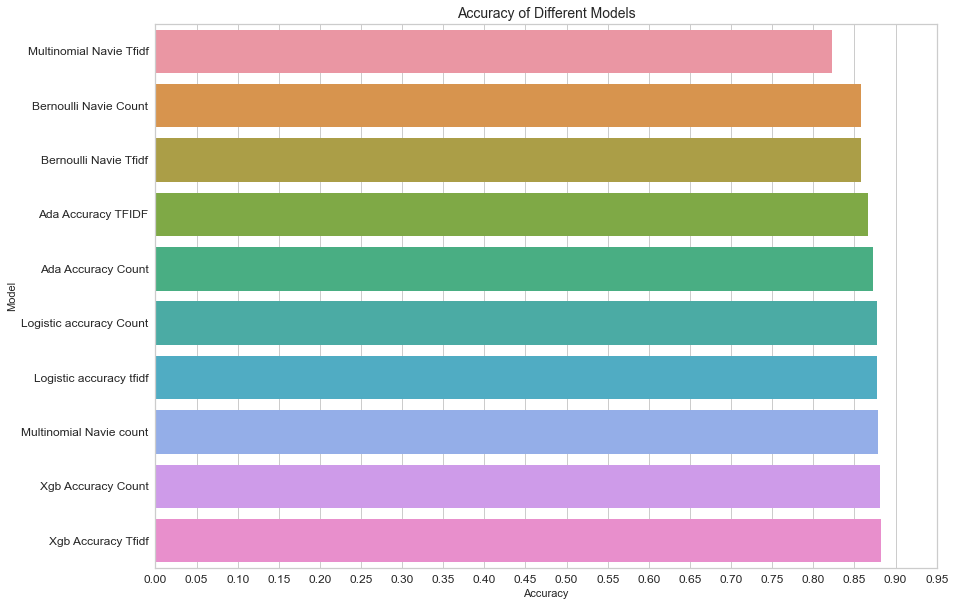

In [97]:
compare = pd.DataFrame({"Model": ["Ada Accuracy Count","Ada Accuracy TFIDF","Xgb Accuracy Count","Xgb Accuracy Tfidf","Logistic accuracy Count","Logistic accuracy tfidf" ,"Multinomial Navie Tfidf","Multinomial Navie count","Bernoulli Navie Count","Bernoulli Navie Tfidf"],
                        "Accuracy": [ada_accuracy_count,ada_accuracy_tf,xgb_accuracy_count,xgb_accuracy_tf,log_accuracy_count,log_accuracy_tfidf,mnb_accuracy_tf,mnb_accuracy_count,bnb_accuracy_count,bnb_accuracy_tf]})
compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(14,10))
ax = sns.barplot(x="Accuracy", y="Model", data=compare)
#ax.set_xlim(.65, .90)

plt.yticks(size = 12)
plt.xticks(np.arange(0, 1, step=0.05),size = 12)
plt.title("Accuracy of Different Models", size=14);

### Conclusion

This project was aimed to used sentiment analysis to determined product recommendation. We started with the data engineering and text mining, which cover change text into tokens, remove punctuation, numbers, stop words and normalization them by using lemmatization. Following we used bag of words model to convert the text into numerical feature vectors. Finally we started training 5 different Classification models and we got the best accuracy of 0.88 for Logistic Regression method. 

In [134]:
custom_scorer["accuracy"]

make_scorer(accuracy_score)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___